## Assignment of Lecture 04

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part1-2: Finish the Solution Parse Part of Edit-Distance

In [1]:
from functools import lru_cache

In [2]:
solution = {}

In [41]:
@lru_cache(maxsize=2**10)
def edit_distance(str1, str2):
    
        if len(str1) == 0: return len(str2)
        if len(str2) == 0: return len(str1)
    
        s1_tail = str1[-1]
        s2_tail = str2[-1]
    
        candidates = [
        (edit_distance(str1[:-1], str2) + 1, "DEL {}".format(s1_tail)),
        (edit_distance(str1, str2[:-1]) + 1, "ADD {}".format(s2_tail))
    ]
    
        if s1_tail == s2_tail:
            both_forward = (edit_distance(str1[:-1], str2[:-1]) + 0, '')
        else:
            both_forward = (edit_distance(str1[:-1], str2[:-1]) + 1, 'SUB {} => {}'.format(s1_tail, s2_tail))
        
        candidates.append(both_forward)
    
        min_distance, operation = min(candidates, key=lambda x: x[0])
        solution[(str1, str2)] = operation
    
        return min_distance

In [42]:
edit_distance('ABC', 'ABC')

0

In [15]:
solution[('ABC', 'ABC')]

'String1 and String2 are same now.'

In [22]:
edit_distance('ABDe', 'ABS')

2

In [43]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABD'): 'ADD D',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABD'): 'ADD D',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABD'): 'SUB C => D',
 ('ABC', 'ABC'): '',
 ('A', 'ABS'): 'ADD S',
 ('AB', 'ABS'): 'ADD S',
 ('ABD', 'A'): 'DEL D',
 ('ABD', 'AB'): 'DEL D',
 ('ABD', 'ABS'): 'SUB D => S',
 ('ABDe', 'A'): 'DEL e',
 ('ABDe', 'AB'): 'DEL e',
 ('ABDe', 'ABS'): 'DEL e',
 ('A', 'ABC'): 'ADD C',
 ('AB', 'ABC'): 'ADD C'}

In [54]:
def parse_solution(str1, str2, solution):
    """ 
    Parse the solution to get each editing step.
    """
    if str1 and str2:
        
        step = solution[(str1, str2)]
        
        if step == '':
            return parse_solution(str1[:-1], str2[:-1], solution)
        if step.startswith('DEL'): 
            return [step] + parse_solution(str1[:-1], str2, solution)
        if step.startswith('ADD'):
            return [step] + parse_solution(str1, str2[:-1], solution)
        if step.startswith('SUB'):
            return [step] + parse_solution(str1[:-1], str2[:-1], solution)
        
    return []

In [40]:
parse_solution('ABDe', 'ABS', solution)

['DEL e', 'SUB D => S']

In [48]:
edit_distance('Beijing', 'Biejrnger')

5

In [49]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABD'): 'ADD D',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABD'): 'ADD D',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABD'): 'SUB C => D',
 ('ABC', 'ABC'): '',
 ('A', 'ABS'): 'ADD S',
 ('AB', 'ABS'): 'ADD S',
 ('ABD', 'A'): 'DEL D',
 ('ABD', 'AB'): 'DEL D',
 ('ABD', 'ABS'): 'SUB D => S',
 ('ABDe', 'A'): 'DEL e',
 ('ABDe', 'AB'): 'DEL e',
 ('ABDe', 'ABS'): 'DEL e',
 ('A', 'ABC'): 'ADD C',
 ('AB', 'ABC'): 'ADD C',
 ('B', 'B'): '',
 ('B', 'Bi'): 'ADD i',
 ('B', 'Bie'): 'ADD e',
 ('B', 'Biej'): 'ADD j',
 ('B', 'Biejr'): 'ADD r',
 ('B', 'Biejrn'): 'ADD n',
 ('B', 'Biejrng'): 'ADD g',
 ('B', 'Biejrnge'): 'ADD e',
 ('B', 'Biejrnger'): 'ADD r',
 ('Be', 'B'): 'DEL e',
 ('Be', 'Bi'): 'SUB e => i',
 ('Be', 'Bie'): '',
 ('Be', 'Biej'): 'ADD j',
 ('Be', 'Biejr'): 'ADD r',
 ('Be', 'Biejrn'): 'ADD n',
 ('Be', 'Biejrng'): 'ADD g',
 ('Be', 'Biejrnge'): 'ADD e',
 ('Be', 'Biejrnger'): 'ADD r',
 ('Bei', 'B'): 'DEL i',
 ('Bei', 'Bi'): 

In [55]:
parse_solution('Beijing', 'Biejrnger', solution)

['ADD r', 'ADD e', 'SUB i => r', 'DEL i', 'ADD i']

### Part 2 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑快与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

### Part 3: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans: 相比于纯搜索，动态规划通过递归等将搜索问题解析成重复的子问题，并存储了子问题的答案，通过查表的方式提高了程序的运行效率，节省了许多时间。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans: 机器学习需要大量的训练数据，训练时间长，价值成本高，得到的是一个概率上近似的结果。在可以应用动态规划的情景下，相比于机器学习可以在较快时间内获得精确结果。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans: 1. 外卖派送线路优化；2. 词语相似度解析；3. 瓷砖切割（盈利最大化）

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans: 1. 查找相似的词语；2. 拼写纠错；3. 抄袭评判

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans: 
1. 动态规划需将一个大问题拆分成许多子问题，这些子问题具有重复性，或前一子问题对后一子问题的求解有帮助；
2. 某状态以后的过程不会影响以前的状态，只与当前状态有关；
3. 问题的最优解所包含的子问题的解也是最优的。

因此DP问题可以分为三个步骤，分解子问题，存储子问题最优解，解析解决方案。

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans: 1. 动态规划问题没有一般性的模型，具体问题要具体分析； 2. 存储子问题结果可能会占用大量内存。

## Part 4 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [56]:
import random
import matplotlib.pylab as plt

In [57]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

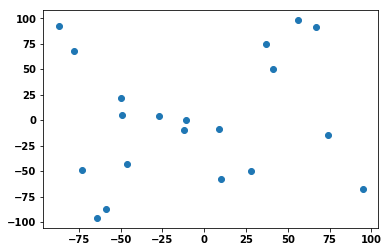

In [58]:
plt.scatter(latitudes, longitude)

给定一个初始点 $P$, 已经 $k$个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短? 

例如： 

In [59]:
chosen_p = (5, 10)

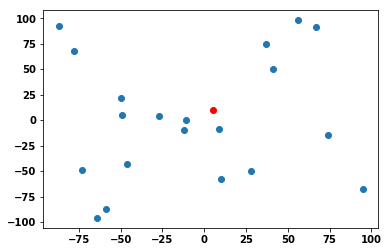

In [60]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')